In [6]:
import numpy as np
import pandas as pd
import time
import jcs_paper_util as util

In [7]:
util.matplotlib_setup()
util.default_num_reps = 1

experiments = [
    [{'sample_size': 10 ** np.arange(3, 6)}, 'Sample size', 'sample_size', 'data_pdf_files/results_sample_size_1647465261.pkl'],
    [{'memo_perct': 10. ** np.arange(-3, 0)}, 'Memory fraction', 'memo_perct', 'data_pdf_files/results_memo_perct_1647473584.pkl'],
    [{'mean_diff': 10. ** np.arange(-3, 0)}, 'Difference in distribution mean', 'mean_diff', 'data_pdf_files/results_mean_diff_1647476529.pkl'],
    [{'std_diff': 10. ** np.arange(-3, 0), 'mean_diff':[0]}, 'Difference in distribution standard deviation', 'std_diff', 'data_pdf_files/results_std_diff_1647479506.pkl'],
]

In [3]:
for e in experiments:
    print(e[2])
    results = util.get_results(**e[0])
    timestamp = int(time.time())
    results.to_pickle('./data_pdf_files/abs_error_{}_{}.pkl'.format(e[2], timestamp))
    

sample_size


100%|█████████████████████████████████████████████████| 9/9 [00:16<00:00,  1.88s/it]

memo_perct



100%|█████████████████████████████████████████████████| 9/9 [01:09<00:00,  7.74s/it]

mean_diff



100%|█████████████████████████████████████████████████| 9/9 [00:45<00:00,  5.03s/it]

std_diff



100%|█████████████████████████████████████████████████| 9/9 [00:44<00:00,  4.92s/it]


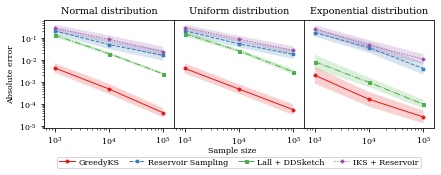

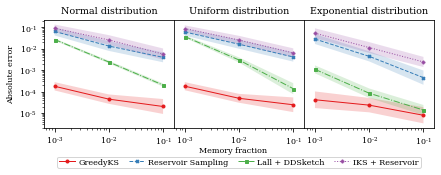

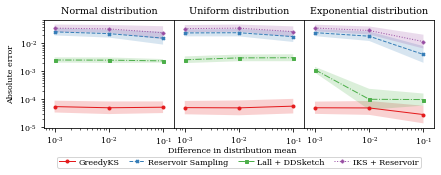

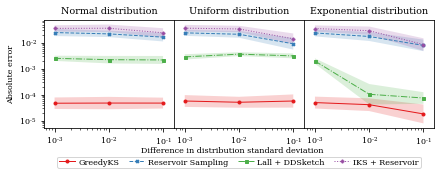

In [8]:
for e in experiments:
    
    results = pd.read_pickle(e[3])
    util.plot_errors(
        results,
        ['Normal distribution', 'Uniform distribution', 'Exponential distribution'],
        'Absolute error',
        e[1],
        e[2],
        "./data_pdf_files/abs_error_{}.pdf".format(e[2])
        )